<a href="https://colab.research.google.com/github/kingajutrzenka/correlation-between-posture-MBTI-analysis/blob/main/%E2%80%A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Correlation between Posture & Personality Trait

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
import plotly.graph_objects as go

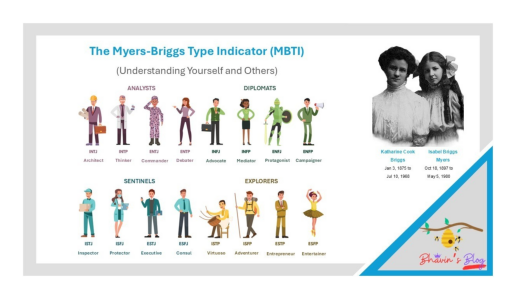

In [14]:
img = mpimg.imread("IMG_7645.jpeg")
plt.imshow(img)
plt.axis('off')
plt.show()

# Data cleaning

In [16]:
df = pd.read_csv("Myers Briggs Table_S1.csv")
df.head()

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A


In [26]:
if 'AGE' in df.columns:
    del df['AGE']
if 'WEIGHT' in df.columns:
    del df['WEIGHT']
if 'SEX' in df.columns:
    del df['SEX']
if 'S No' in df.columns:
    del df['S No']
df.head()

,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,N,T,F,J,P,POSTURE
0,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,9,9,13,18,4,A
1,High,7.0,8.0,5.0,3.0,ISTJ,6,15,12,21,3,13,9,B
2,High,0.0,0.0,0.0,0.0,ESTJ,15,6,10,15,9,12,10,A
3,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,5,13,11,19,3,D
4,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,6,9,15,16,6,A


In [43]:
df['TOTAL PAIN'] = df['PAIN 1'] + df['PAIN 2'] + df['PAIN 3'] + df['PAIN 4']
if 'TOTALL PAIN' in df.columns:
    del df['TOTALL PAIN']
if 'pain' in df.columns:
    del df['pain']
df.head()

,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,N,T,F,J,P,POSTURE,TOTAL PAIN
0,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,9,9,13,18,4,A,0.0
1,High,7.0,8.0,5.0,3.0,ISTJ,6,15,12,21,3,13,9,B,23.0
2,High,0.0,0.0,0.0,0.0,ESTJ,15,6,10,15,9,12,10,A,0.0
3,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,5,13,11,19,3,D,30.0
4,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,6,9,15,16,6,A,13.0


# Total pain I vs E, T vs F, P vs J

**Pain**
- pain 1 - pain in the neck (szyja)
- pain 2 - pain in the thoracic (klatka piersiowa)
- pain 3 - pain in the lumbar (kręgosłup lędźwiowy)
- pain 4 - pain in the sacral (kręgi krzyżowe)

Total pain in introverts and extroverts

In [73]:
print(f'Introverts: {df["I"].count()}')
print(f'Extroverts: {df["E"].count()}')
print(f'Thinking people: {df["T"].count()}')
print(f'Feeling people: {df["F"].count()}')
print(f'Judging people: {df["J"].count()}')
print(f'Prospecting people: {df["P"].count()}')

Introverts: 97
Extroverts: 97
Thinking people: 97
Feeling people: 97
Judging people: 97
Prospecting people: 97


In [67]:
introvert_pain = df[df['I'] > df['E']]['TOTAL PAIN'].sum()
extrovert_pain = df[df['E'] > df['I']]['TOTAL PAIN'].sum()

fig = go.Figure(data=[
    go.Bar(x=['Introverts', 'Extroverts'], y=[introvert_pain, extrovert_pain], marker_color=['#9A5DAD', '#D2A744'])
])
fig.update_layout(title_text='Total pain in introverts and extroverts')
fig.show()

In [77]:
thinking_pain = df[df['T'] > df['F']]['TOTAL PAIN'].sum()
feeling_pain = df[df['F'] > df['T']]['TOTAL PAIN'].sum()

fig = go.Figure(data=[
    go.Bar(x=['Thinking people', 'Feeling people'], y=[thinking_pain, feeling_pain], marker_color=['#9A5DAD', '#6CB56F'])
])
fig.update_layout(title_text='Total pain in thinking people and feeling people')
fig.show()

In [76]:
j_pain = df[df['J'] > df['P']]['TOTAL PAIN'].sum()
p_pain = df[df['P'] > df['J']]['TOTAL PAIN'].sum()

fig = go.Figure(data=[
    go.Bar(x=['Judging people', 'Prospecting people'], y=[j_pain, p_pain], marker_color=['#53B0B5', '#D2A744'])
])
fig.update_layout(title_text='Total pain in judging people and prospecting people')
fig.show()

**Conclusions**

This analsysis isn't full, because I don't have information about characteristic S - Observant.

After analysis i make some conclusions:
- extroverts have bigger total pain than introverts
- feeling people have biger total pain than thinking people
- judging people have similar total pain to prospecting people.

# Total pain in given type

In MBTI we have four groups of personality type:
- Analysts: type with features : N and T
- Dimlomats: type with featutes : N and F
- Sentinels: type with features : S and J
- Explorers: type with features : S and P

In [89]:
# Define the MBTI types within each group
analysts = ['INTP', 'INTJ', 'ENTP', 'ENTJ']
diplomats = ['INFP', 'INFJ', 'ENFP', 'ENFJ']
sentinels = ['ISFJ', 'ISTJ', 'ESFJ', 'ESTJ']
explorers = ['ISTP', 'ISFP', 'ESTP', 'ESFP']

analysts_count = df[df['MBTI'].isin(analysts)].shape[0]
diplomats_count = df[df['MBTI'].isin(diplomats)].shape[0]
sentinels_count = df[df['MBTI'].isin(sentinels)].shape[0]
explorers_count = df[df['MBTI'].isin(sentinels)].shape[0]

print("Numer of people in a given group")
print(f'analysts - {analysts_count}')
print(f'diplomats - {diplomats_count}')
print(f'sentinels - {sentinels_count}')
print(f'explorers - {explorers_count}')

# Calculate the total pain for each group
analysts_pain = df[df['MBTI'].isin(analysts)]['TOTAL PAIN'].sum()
diplomats_pain = df[df['MBTI'].isin(diplomats)]['TOTAL PAIN'].sum()
sentinels_pain = df[df['MBTI'].isin(sentinels)]['TOTAL PAIN'].sum()
explorers_pain = df[df['MBTI'].isin(explorers)]['TOTAL PAIN'].sum()

print(f"Total pain for Analysts: {analysts_pain}")
print(f"Total pain for Diplomats: {diplomats_pain}")
print(f"Total pain for Sentinels: {sentinels_pain}")
print(f"Total pain for Explorers: {explorers_pain}")

tp_per_person_analysts = analysts_pain / analysts_count
tp_per_person_diplomats = diplomats_pain / diplomats_count
tp_per_person_sentinels = sentinels_pain / sentinels_count
tp_per_person_explorers = explorers_pain / explorers_count

print(f"Total pain per person for Analysts: {tp_per_person_analysts}")
print(f"Total pain per person for Diplomats: {tp_per_person_diplomats}")
print(f"Total pain per person for Sentinels: {tp_per_person_sentinels}")
print(f"Total pain per person for Explorers: {tp_per_person_explorers}")

Numer of people in a given group
analysts - 11
diplomats - 24
sentinels - 29
explorers - 29
Total pain for Analysts: 100.5
Total pain for Diplomats: 258.5
Total pain for Sentinels: 311.0
Total pain for Explorers: 335.0
Total pain per person for Analysts: 9.136363636363637
Total pain per person for Diplomats: 10.770833333333334
Total pain per person for Sentinels: 10.724137931034482
Total pain per person for Explorers: 11.551724137931034


In [92]:
fig = go.Figure(data=[
    go.Bar(x=['Analysts', 'Diplomats', 'Sentinels', 'Explorers'], y=[tp_per_person_analysts, tp_per_person_diplomats, tp_per_person_sentinels, tp_per_person_explorers],
           marker_color = ['#9A5DAD', '#6CB56F', '#53B0B5', '#D2A744'])
])
fig.update_layout(title_text='Total pain per person in given type')
fig.show()

**Conclusions**

This analysis has really intresting results. I see big diffrence between analysis and explorers. I am shocked, but i think this results can be realistic.